In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import pickle


%matplotlib inline

In [3]:
dropouts = pd.read_csv('training_2009.csv')

In [4]:
dropouts

,sid,sid_type,first_coop_code,first_dist_code,first_hs_code,first_dist_name,first_hs_name,first_hs_alt,first_hs_urbanicity,chrt_ninth,...,ihe_retention_lt_4_yr_part_time,ihe_federal_loan_rate,ihe_share_25_older,ihe_med_debt_completers_all,ihe_med_debt_completers_pmts,ihe_ihe_repay_3_yr_all,ihe_rate_4_yr,ihe_rate_lt_4_yr,ihe_med_earn_10_yrs_after,ihe_pct_earn_gt_25k_6_yrs_after
0,2,Fake record,WKEC,415,5194,Everett,Everett,0,Town: Remote,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,Fake record,GRREC,199,1648,Kingfisher,Kingfisher,0,Town: Distant,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,Fake record,GRREC,142,1564,Diamond Lake,Diamond Lake,0,Rural: Distant,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13,Fake record,OVEC,238,2230,Orange,Pike,0,Suburb: Large,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,Fake record,NKCES,517,7658,Foster,Kent,0,Rural: Fringe,2009,...,NaN,0.5491,0.2428,24458.5,271.53949,0.757102,0.375890,NaN,36100.0,0.591997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52937,111984,Fake record,CKEC,262,3820,Oceanview,Burton,0,City: Large,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52938,111985,Fake record,CKEC,289,3270,Universal,Jupiter,0,Town: Fringe,2009,...,NaN,0.4725,0.1686,19500.0,216.48997,0.662626,0.441241,NaN,32100.0,0.475793
52939,111986,Fake record,NKCES,541,7810,Cilian,Cilian,0,Rural: Distant,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52940,111988,Fake record,WKEC,421,5856,Zirvas,Rainbow,0,Town: Remote,2009,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dropouts.describe()

,sid,first_dist_code,first_hs_code,first_hs_alt,chrt_ninth,male,frpl,iep,ell,gifted,...,ihe_retention_lt_4_yr_part_time,ihe_federal_loan_rate,ihe_share_25_older,ihe_med_debt_completers_all,ihe_med_debt_completers_pmts,ihe_ihe_repay_3_yr_all,ihe_rate_4_yr,ihe_rate_lt_4_yr,ihe_med_earn_10_yrs_after,ihe_pct_earn_gt_25k_6_yrs_after
count,52942.000000,52942.000000,52942.000000,52942.000000,52942.0,52931.000000,52258.000000,52942.000000,52942.000000,52942.000000,...,7411.000000,21149.000000,21149.000000,20983.000000,20983.000000,21149.000000,13640.000000,7509.000000,21149.000000,21149.000000
mean,55852.370273,380.206528,5263.878131,0.053398,2009.0,0.520357,0.604022,0.113653,0.015791,0.190189,...,0.384539,0.473196,0.276767,19388.214507,215.248927,0.643495,0.472697,0.312635,32081.242612,0.530085
std,32377.301687,163.563276,2786.710570,0.224828,0.0,0.499590,0.489064,0.317392,0.124667,0.392454,...,0.057170,0.130927,0.151887,5198.379302,57.712667,0.149136,0.112298,0.099368,6327.732833,0.095979
min,2.000000,103.000000,1106.000000,0.000000,2009.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.310300,0.044100,0.000700,5750.000000,63.836788,0.261312,0.159809,0.170209,20600.000000,0.309300
25%,27807.500000,238.000000,2850.000000,0.000000,2009.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.328300,0.383100,0.172800,14642.500000,162.561770,0.466288,0.377848,0.251012,26300.000000,0.449474
50%,55795.500000,388.000000,5294.000000,0.000000,2009.0,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.380100,0.459700,0.215000,20500.000000,227.592030,0.663946,0.432884,0.293832,33100.000000,0.541185
75%,83894.750000,538.000000,7492.000000,0.000000,2009.0,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.431900,0.541300,0.422700,24093.000000,267.481690,0.778180,0.535935,0.398137,36100.000000,0.593796
max,111990.000000,613.000000,9902.000000,1.000000,2009.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.697000,0.907100,0.735600,34942.000000,387.927830,0.950102,0.923592,0.623265,60900.000000,0.793860


In [6]:
dropouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52942 entries, 0 to 52941
Data columns (total 68 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   sid                              52942 non-null  int64  
 1   sid_type                         52942 non-null  object 
 2   first_coop_code                  52942 non-null  object 
 3   first_dist_code                  52942 non-null  int64  
 4   first_hs_code                    52942 non-null  int64  
 5   first_dist_name                  52942 non-null  object 
 6   first_hs_name                    52942 non-null  object 
 7   first_hs_alt                     52942 non-null  int64  
 8   first_hs_urbanicity              52484 non-null  object 
 9   chrt_ninth                       52942 non-null  int64  
 10  male                             52931 non-null  float64
 11  race_ethnicity                   52257 non-null  object 
 12  frpl              

In [7]:
#the features selected in this dataframe are those used in a previous study at the Harvard Center for Education Policy and the Stategic Data Project
fs_dropouts = dropouts[["dropout",
              "male",
              "race_ethnicity",
              "math_ss",
              "read_ss",
              "gifted",
              "ever_alternative",
              "iep",
              "pct_days_absent",
              "gpa",
              "frpl",
              "ell"]]

### Let's define these features (https://hwpi.harvard.edu/files/sdp/files/step_1_stata_identify_data_specification_guide.pdf)

    - "dropout" - target variable, whether or not student dropped out,
    - "male",
    - "race_ethnicity",
    - "math_ss" - math standardized test score,
    - "read_ss" - reading standardized test score,
    - "gifted" - whether student was ever enrolled in a gifted program,
    - "ever_alternative" - whether student was ever enrolled in a alternative program,
    - "iep" - whether student was ever assigned an individualized education plan,
    - "pct_days_absent" - percent days absent,
    - "gpa" - student grade point average,
    - "frpl" - whether student was ever in federal free or reduced price lunch program,
    - "ell" - whether student was ever enrolled in an english language learner(english as second language) program

In [8]:
fs_dropouts

,dropout,male,race_ethnicity,math_ss,read_ss,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell
0,0,0.0,White,NaN,NaN,0,1,0,10.664031,1.230000,1.0,0
1,0,0.0,White,18.0,46.0,0,0,0,0.969005,2.822795,1.0,0
2,1,0.0,White,18.0,35.0,0,1,0,4.746706,0.330000,0.0,0
3,0,0.0,White,48.0,80.0,0,0,1,6.850071,2.985000,1.0,0
4,0,1.0,White,18.0,30.0,0,0,0,5.802631,2.118500,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
52937,0,1.0,African-American,34.0,44.0,0,1,1,9.833898,2.079800,1.0,0
52938,0,0.0,White,23.0,51.0,1,1,0,2.291429,3.443500,0.0,0
52939,0,1.0,White,4.0,18.0,0,0,1,7.766962,1.695142,1.0,0
52940,1,1.0,African-American,29.0,34.0,0,1,0,15.343004,1.567000,1.0,0


In [9]:
fs_dropouts.describe()

,dropout,male,math_ss,read_ss,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell
count,52942.000000,52931.000000,43953.000000,43967.000000,52942.000000,52942.000000,52942.000000,52855.000000,51720.000000,52258.000000,52942.000000
mean,0.186789,0.520357,41.362933,47.455956,0.190189,0.274262,0.113653,8.436930,2.631160,0.604022,0.015791
std,0.389746,0.499590,21.401209,16.414730,0.392454,0.446146,0.317392,16.322560,0.853238,0.489064,0.124667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,26.000000,37.000000,0.000000,0.000000,0.000000,3.188880,2.044000,0.000000,0.000000
50%,0.000000,1.000000,42.000000,47.000000,0.000000,0.000000,0.000000,6.079365,2.694000,1.000000,0.000000
75%,0.000000,1.000000,57.000000,58.000000,0.000000,1.000000,0.000000,10.794286,3.306613,1.000000,0.000000
max,1.000000,1.000000,183.000000,177.000000,1.000000,1.000000,1.000000,3153.000000,4.000000,1.000000,1.000000


In [10]:
fs_dropouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52942 entries, 0 to 52941
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dropout           52942 non-null  int64  
 1   male              52931 non-null  float64
 2   race_ethnicity    52257 non-null  object 
 3   math_ss           43953 non-null  float64
 4   read_ss           43967 non-null  float64
 5   gifted            52942 non-null  int64  
 6   ever_alternative  52942 non-null  int64  
 7   iep               52942 non-null  int64  
 8   pct_days_absent   52855 non-null  float64
 9   gpa               51720 non-null  float64
 10  frpl              52258 non-null  float64
 11  ell               52942 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 4.8+ MB


Notes: 

There are missing values for male(11), race_ethnicity(685), math_ss(8989), read_ss(8975), pct_days_absent(87), gpa(1222), and frpl(684)

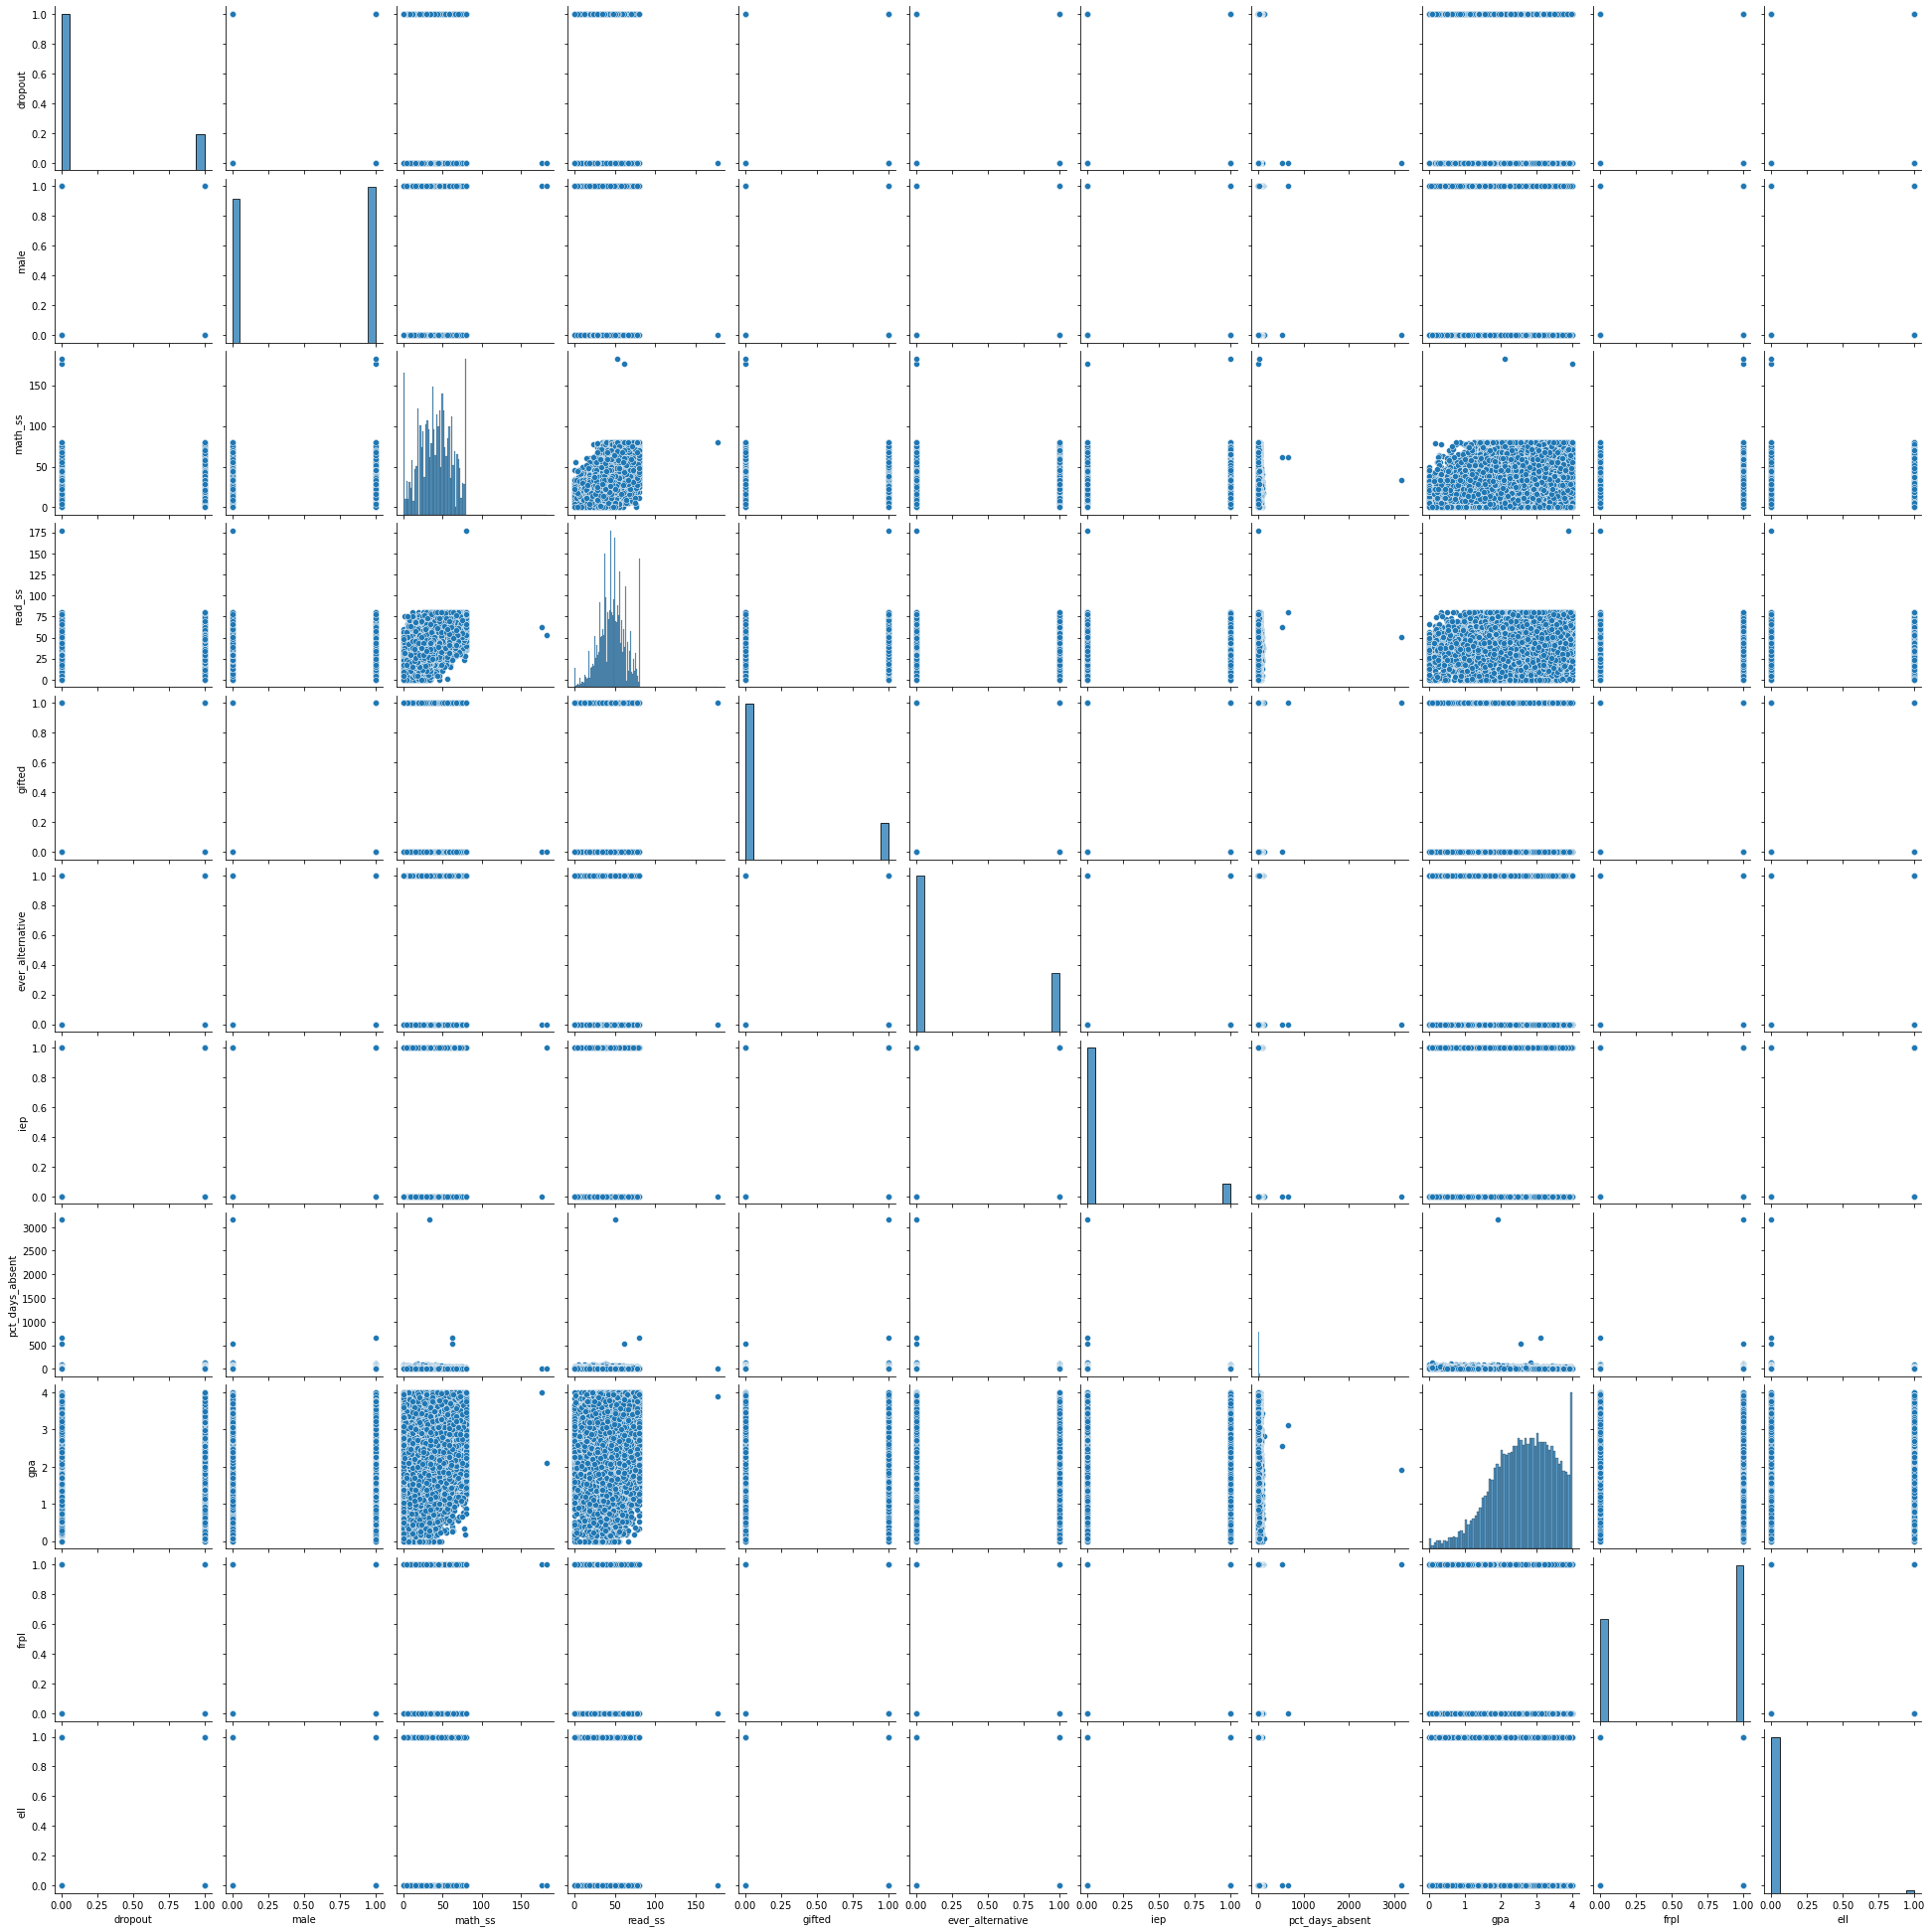

In [21]:
sns.pairplot(fs_dropouts)

This tells us a couple of things:

- most of the data is categorical, with many of the features being binary categorical
- you would think gpa and standardized testing scores would have some kind of relationship, but at first glance there doesn't appear to be any (however there are some pretty significant outlier that may be skewing the data
- notice the distributions of the ss scores and the gpa
- the race data is missing because it is string values(it is still categorical though, so we will have to dummized it
- at this first juncture it looks like the pct_days_absent feature has the strongest correlation with whether or not a student graduates

In [18]:
fs_dropouts['dropout'].value_counts()

0    43053
1     9889
Name: dropout, dtype: int64

/Users/kiara/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='dropout', ylabel='count'>

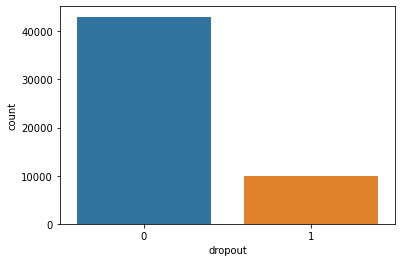

In [12]:
sns.countplot(fs_dropouts["dropout"])

In [19]:
fs_dropouts['dropout'].value_counts()[1]/len(fs_dropouts['dropout'])

0.1867893166106305

Note: we can see the target class is imbalanced(only ~19% are dropouts), so we'll have to account for this when modelling

(array([ 533.,  802., 1747., 3165., 5787., 7624., 8410., 8506., 7855.,
        7291.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

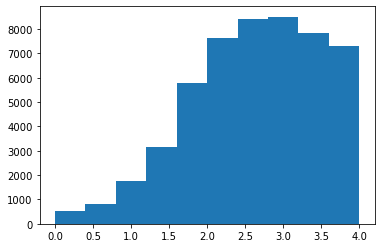

In [26]:
#let's look a little closer at gpa
plt.hist(fs_dropouts['gpa'])

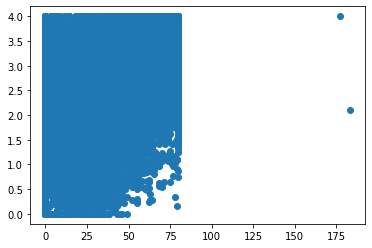

In [27]:
plt.scatter(fs_dropouts['math_ss'], fs_dropouts['gpa'])

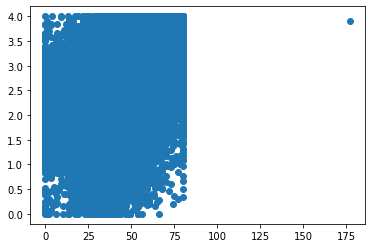

In [28]:
plt.scatter(fs_dropouts['read_ss'], fs_dropouts['gpa'])

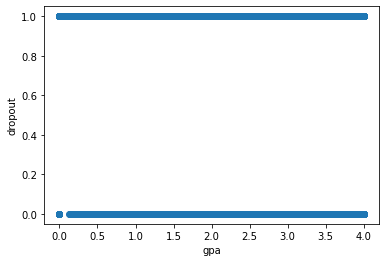

In [32]:
fig, ax = plt.subplots()
ax.set_xlabel('gpa')
ax.set_ylabel('dropout')
ax.scatter(fs_dropouts['gpa'], fs_dropouts['dropout'])

In [36]:
fs_dropouts[fs_dropouts['math_ss'] > 100] #<--note it is impossible for math scores to be this high(highest score is 100)

,dropout,male,race_ethnicity,math_ss,read_ss,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell
8773,0,1.0,White,177.0,62.0,0,0,0,0.827389,4.0000,1.0,0
19990,0,1.0,White,183.0,53.0,0,0,1,14.306123,2.1023,1.0,0


let's drop those rows (it looks like a 1 typo, but I would risk poorly informing the data if I just "fixed" myself, and considering thise is old, anonymized data, I wouldn't be able to figure out the real vals anyway)

In [37]:
fs_dropouts = fs_dropouts[fs_dropouts['math_ss'] < 100]

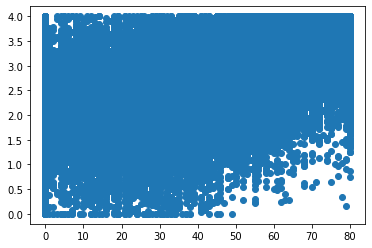

In [38]:
plt.scatter(fs_dropouts['math_ss'], fs_dropouts['gpa']) #this makes things a little more approachable, specifically the bottom right corner

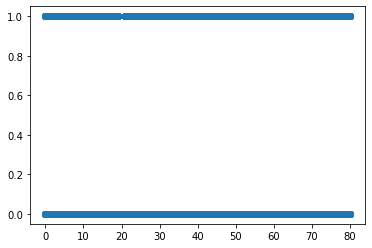

In [42]:
plt.scatter(fs_dropouts['math_ss'], fs_dropouts['dropout']) 

let's do the same for reading scores over 100

In [43]:
fs_dropouts[fs_dropouts['read_ss'] > 100] 

,dropout,male,race_ethnicity,math_ss,read_ss,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell
29195,0,0.0,White,80.0,177.0,1,0,0,1.657515,3.898,0.0,0


In [44]:
fs_dropouts = fs_dropouts[fs_dropouts['read_ss'] < 100]

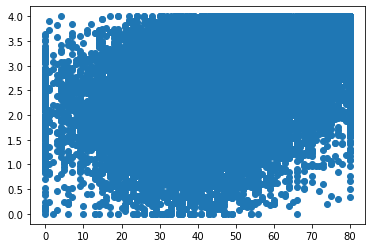

In [45]:
plt.scatter(fs_dropouts['read_ss'], fs_dropouts['gpa'])

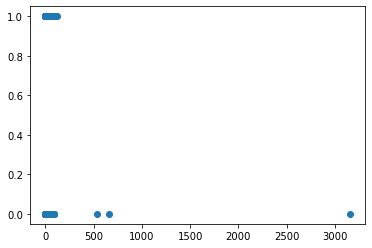

In [46]:
#Let's also look at pct days absent vs dropouts
plt.scatter(fs_dropouts['pct_days_absent'], fs_dropouts['dropout'])

Ok, this is PERCENT days absent, so anything over 100 is not possible...

In [47]:
fs_dropouts[fs_dropouts['pct_days_absent'] > 100] 

,dropout,male,race_ethnicity,math_ss,read_ss,gifted,ever_alternative,iep,pct_days_absent,gpa,frpl,ell
2239,0,0.0,Multiple/Native American,62.0,62.0,0,0,0,533.18750,2.556,1.0,0
7230,1,1.0,African-American,18.0,38.0,0,1,0,118.05007,NaN,1.0,0
14853,0,1.0,White,62.0,80.0,1,0,0,657.59998,3.101,0.0,0
48195,0,0.0,White,33.0,51.0,1,0,0,3153.00000,1.917,1.0,0


In [48]:
fs_dropouts = fs_dropouts[fs_dropouts['pct_days_absent'] < 100]

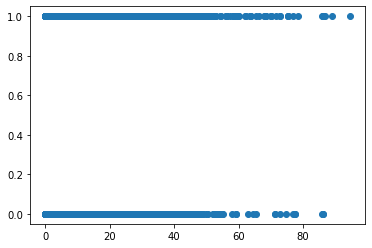

In [49]:
plt.scatter(fs_dropouts['pct_days_absent'], fs_dropouts['dropout']) #this looks a lot more informative